# Brute Forcing Negami's Conjecture #

Negami's conjecture states that a finite graph has a finite planar covering if and only if it embeds in projective space. A great deal of work has been done, and I encourage you to read the [Wikipedia page](https://en.wikipedia.org/wiki/Planar_cover) on finite covers for background, or better yet some of the paper that have been written.

But for what follows here it suffices to know that the conjecture has been reduced to the following question: does the graph $K_{2,2,2,1}$ have a finite, planar cover? I spent a little time trying and failing to prove that it does not, but I also did some brute force searching to see if I could find a planar cover.

The important point here is that checking if a given graph is planar is not difficult computationally. In fact, a graph with $n$ vertices can have its planarity checked in $O(n)$ time (again, [I point to the Wikipedia](https://en.wikipedia.org/wiki/Planarity_testing)). So it would be crazy not to spent some time brute forcing with asmptotics that good!

Moreover, everything you need is largely implemented. In what follows my major "contribution" is writing a function that generates a finite cover of a given degree. Everything else is demonstration of what existing, well known Python modules can do (networkx in particular).

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output

My graphs will be graph objects as given by the networkx module ([see their tutorial](https://networkx.org/documentation/stable/tutorial.html)). The random cover is conceptually produced in the "natural" way. First, find a  spanning tree and take $d$ copies of it. Each vertex in the $i$-th copy has an $i$ appended to the label determining the vertex (which I will denote be subscripts in Latex). Then for each edge $(u,v)$ we use a randomly chosen permutation $\sigma$ to insert edges $(u_i,v_{\sigma(i)})$.

In [2]:
# Takes a graph object, a desired degree, and returns a graph object that is degree d cover of the graph.
# If you like, you can choose your own permutation function!
def randomCover( Graph, degree, permuter = random.shuffle):
    Index = list(range(0,degree))
    spanning_edges = nx.minimum_spanning_edges(Graph)
    Cover_edges = []
    for edge in Graph.edges():
        if edge in spanning_edges:
            for i in range(0, degree):
                Cover_edges.append( (edge[0] + str(i), edge[1] + str(i) ))
        else:
            permuter(Index)
            for i in range(0, degree):
                Cover_edges.append( (edge[0] + str(i), edge[1] + str(Index[i]) ))
    G2 = nx.Graph()
    G2.add_edges_from(Cover_edges)
    return G2


To warm up let us consider $K_5$.

Is K5 planer? False


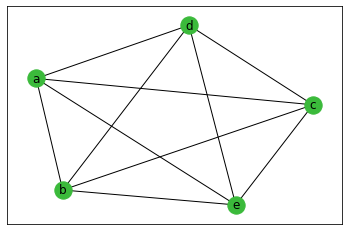

In [3]:
K5edgelist = [('a', 'b'), ('a', 'c'), ('a', 'd'), 
             ('a', 'e'), ('b', 'c'),('b', 'd'),('b', 'e'),
             ('c', 'd'), ('c', 'e'), ('d', 'e')]

K5 = nx.Graph()
K5.add_edges_from(K5edgelist)
nx.draw_networkx(K5, pos=nx.spring_layout(K5), node_color=[(0.23,0.73,0.23)])
print("Is K5 planer? " + str(nx.is_planar(K5)))

Although $K_5$ is famously non-planar, it is in fact virtually planar. Thus it is a useful test case for seeing if our random covers will really generate planar covers. Here we construct ten random double covers to see if we can find a planar cover. I have colored the nodes red if they are planar, and blue if they are non-planar. When I run it I get a mix of planar and non-planar covers. (You will likely have to scroll through the output).

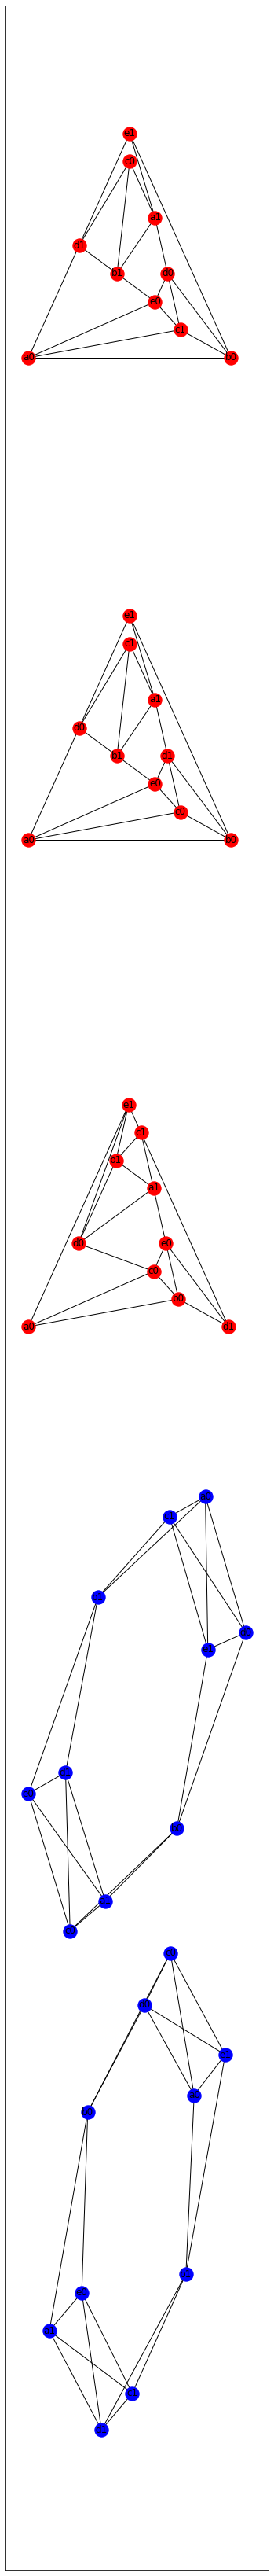

In [4]:

plt.rcParams['figure.figsize'] = [6, 30]

K5_dcs = []
for i in range(0,5):
    K5_dcs.append(randomCover(K5, 2))
    
    if nx.is_planar(K5_dcs[-1]):
        position = nx.planar_layout(K5_dcs[-1])
        for key in position.keys():
            position[key] += np.array([0,2*i])
        nx.draw_networkx(K5_dcs[-1], pos=position, node_color=["red"])
    else:
        position = nx.spring_layout(K5_dcs[-1])
        for key in position.keys():
            position[key] += np.array([0,2*i])
        nx.draw_networkx(K5_dcs[-1], pos=position, node_color=["blue"])


We can also try taking covers of different degrees. Conjecturally, if a planar cover exists, it will be a double cover, but if $K_{2,2,2,1}$ is virtually planar, and the conjecture is false, we will have to look at higher degrees. Note that you can easily construct by hand a planar cover of any degree that is a power of two, by cutting an pasting planar embeddings of degree two. But it looks to me like they are not generic.

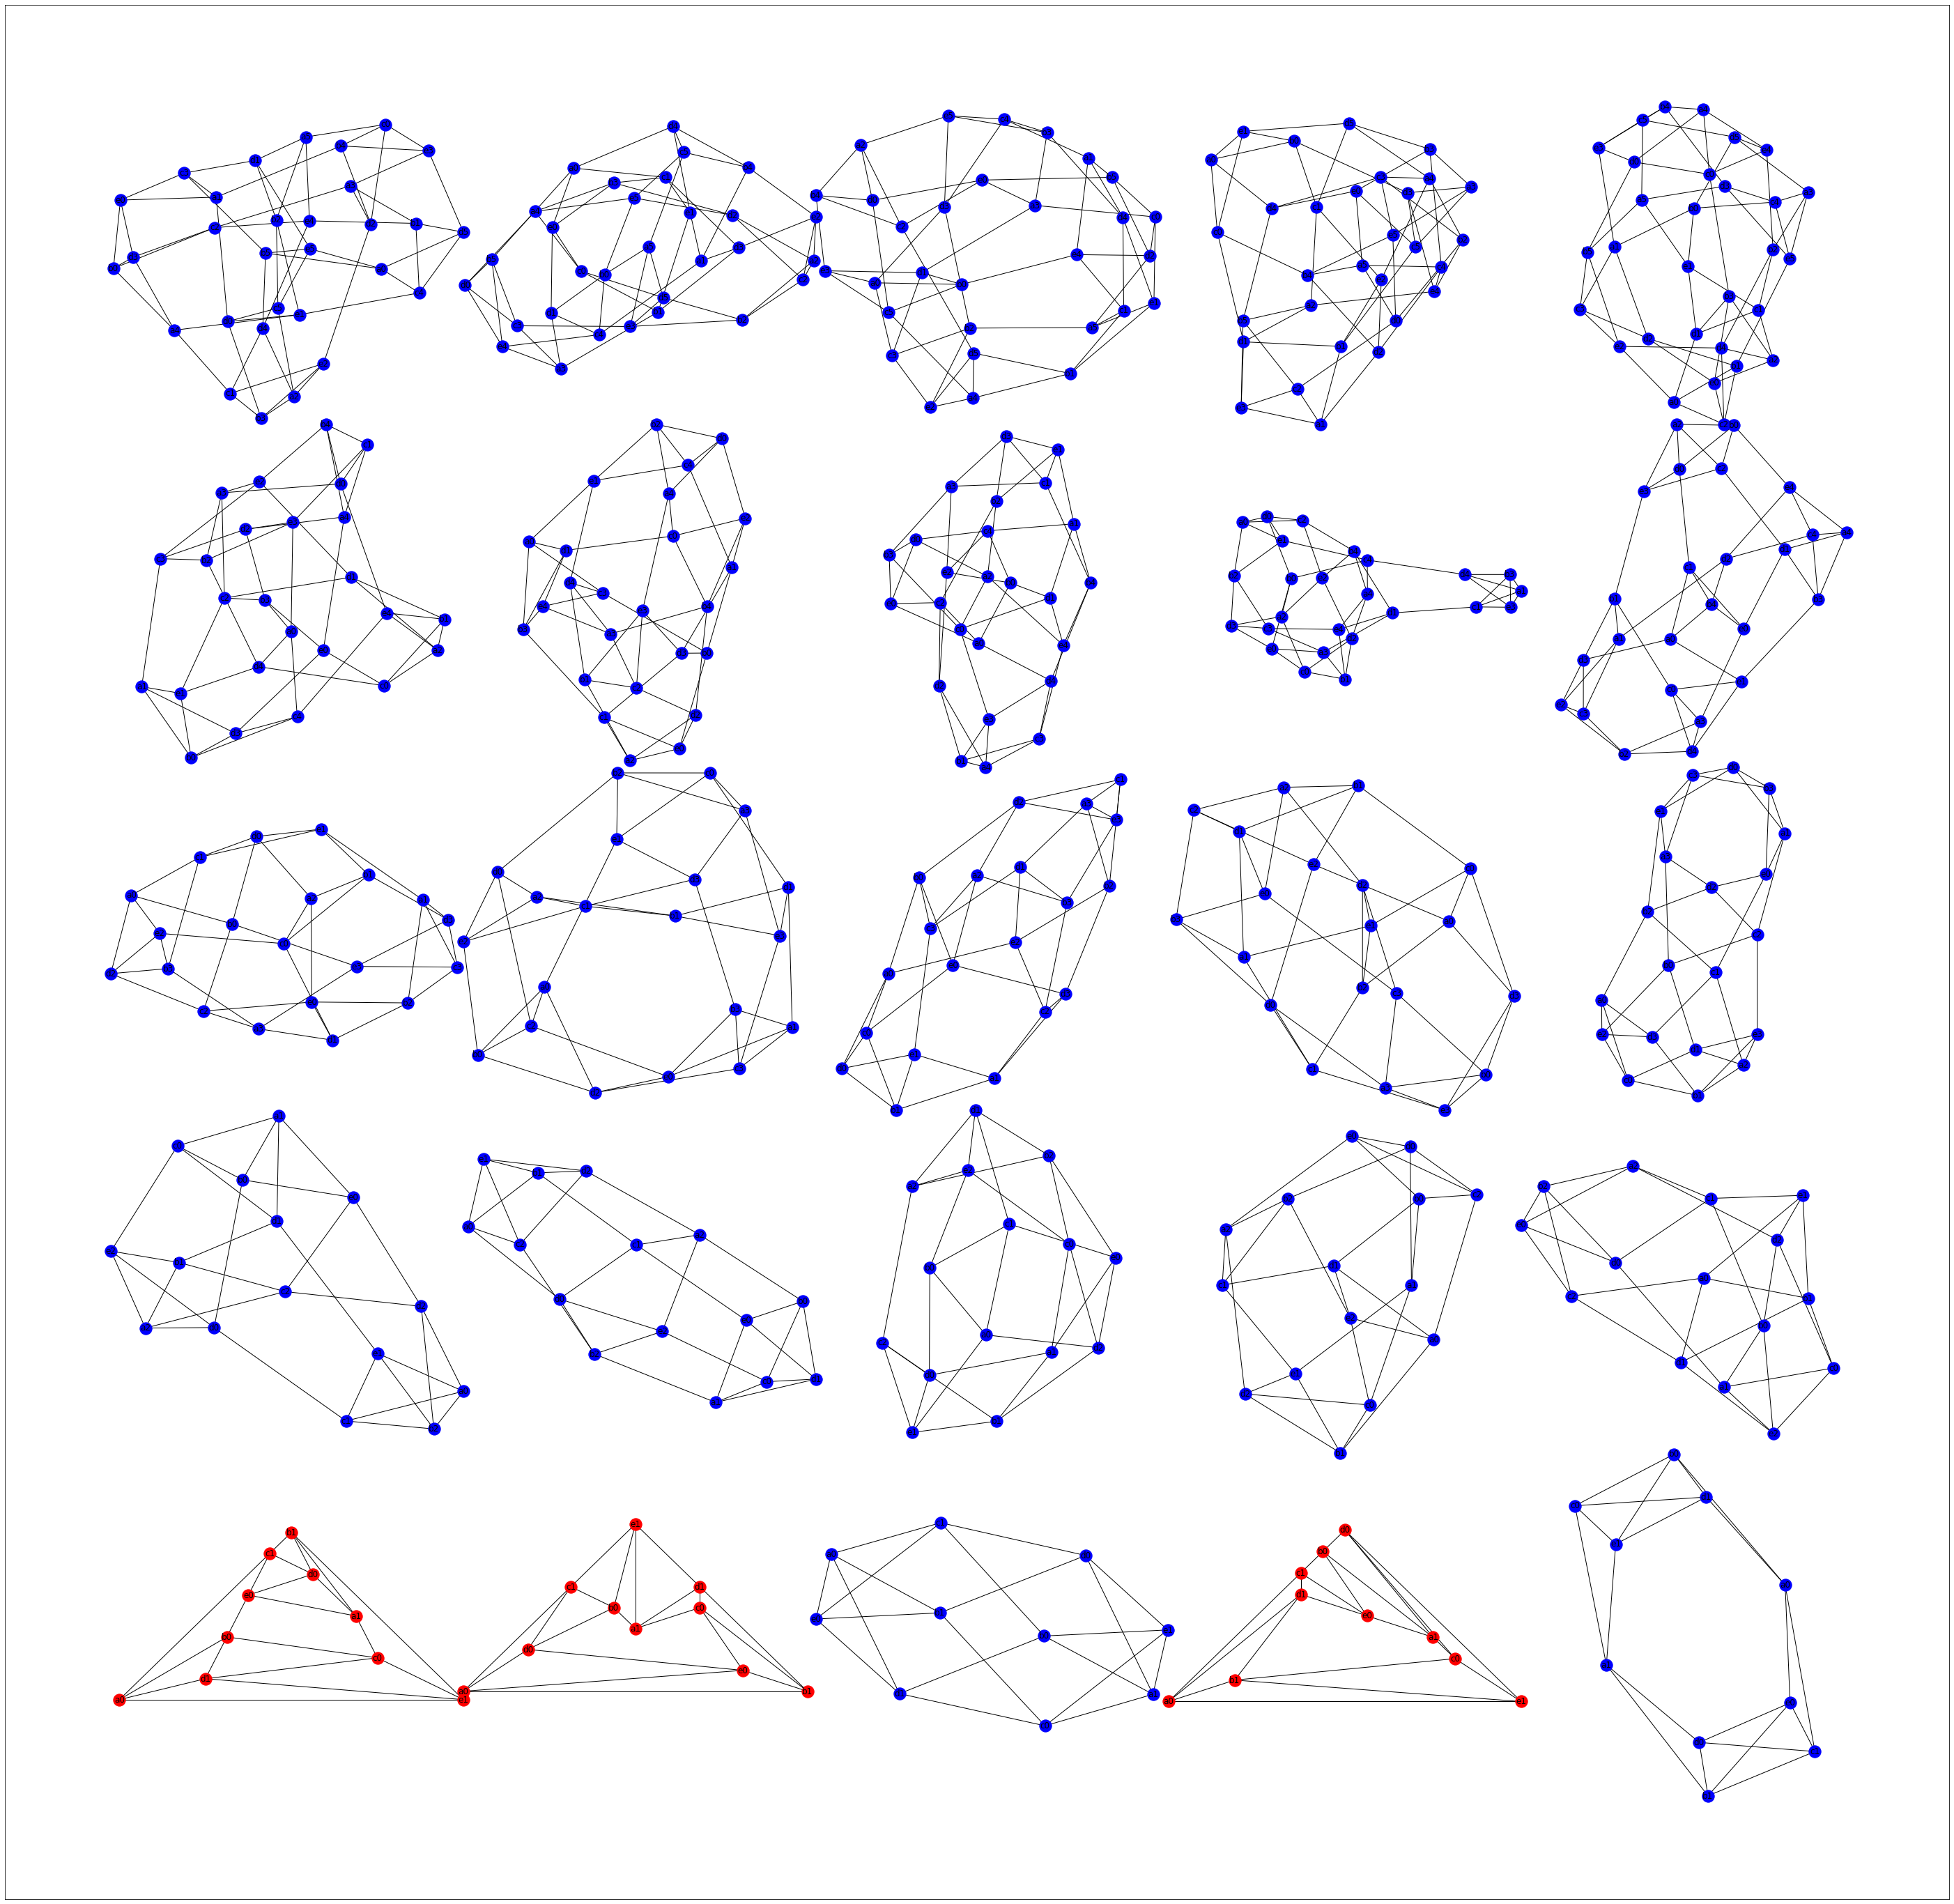

In [5]:
plt.rcParams['figure.figsize'] = [50, 50]

covers = []
for d in range(2,7):
    covers.append([])
    for i in range(0,5):
        covers[-1].append(randomCover(K5, d))

        if nx.is_planar(covers[-1][-1]):
            position = nx.planar_layout(covers[-1][-1])
            for key in position.keys():
                position[key] += np.array([2*i,2*d])
            nx.draw_networkx(covers[-1][-1], pos=position, node_color=["red"])
        else:
            position = nx.spring_layout(covers[-1][-1])
            for key in position.keys():
                position[key] += np.array([2*i, 2*d])
            nx.draw_networkx(covers[-1][-1], pos=position, node_color=["blue"])

Instead we can try searching at degree 4 until we find a planar cover (or we reach i == 1000). 

Cover: 291


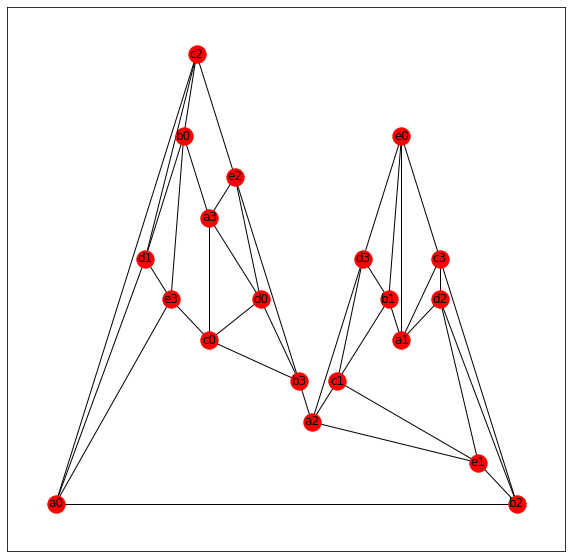

In [6]:
plt.rcParams['figure.figsize'] = [10, 10]

for i in range(0,1000):
    rando_cover = randomCover(K5, 4)
    if nx.is_planar(rando_cover):
            position = nx.planar_layout(rando_cover)
            nx.draw_networkx(rando_cover, pos=position, node_color=["red"])
            break
    clear_output(wait=True)
    print("Cover: " + str(i))

            

Or we can iteratively take degree two covers. (Note: for me at least, it won't always find a degree 8 cover.)

cover degree 2 found...
cover degree 4 found...
cover degree 8 found...


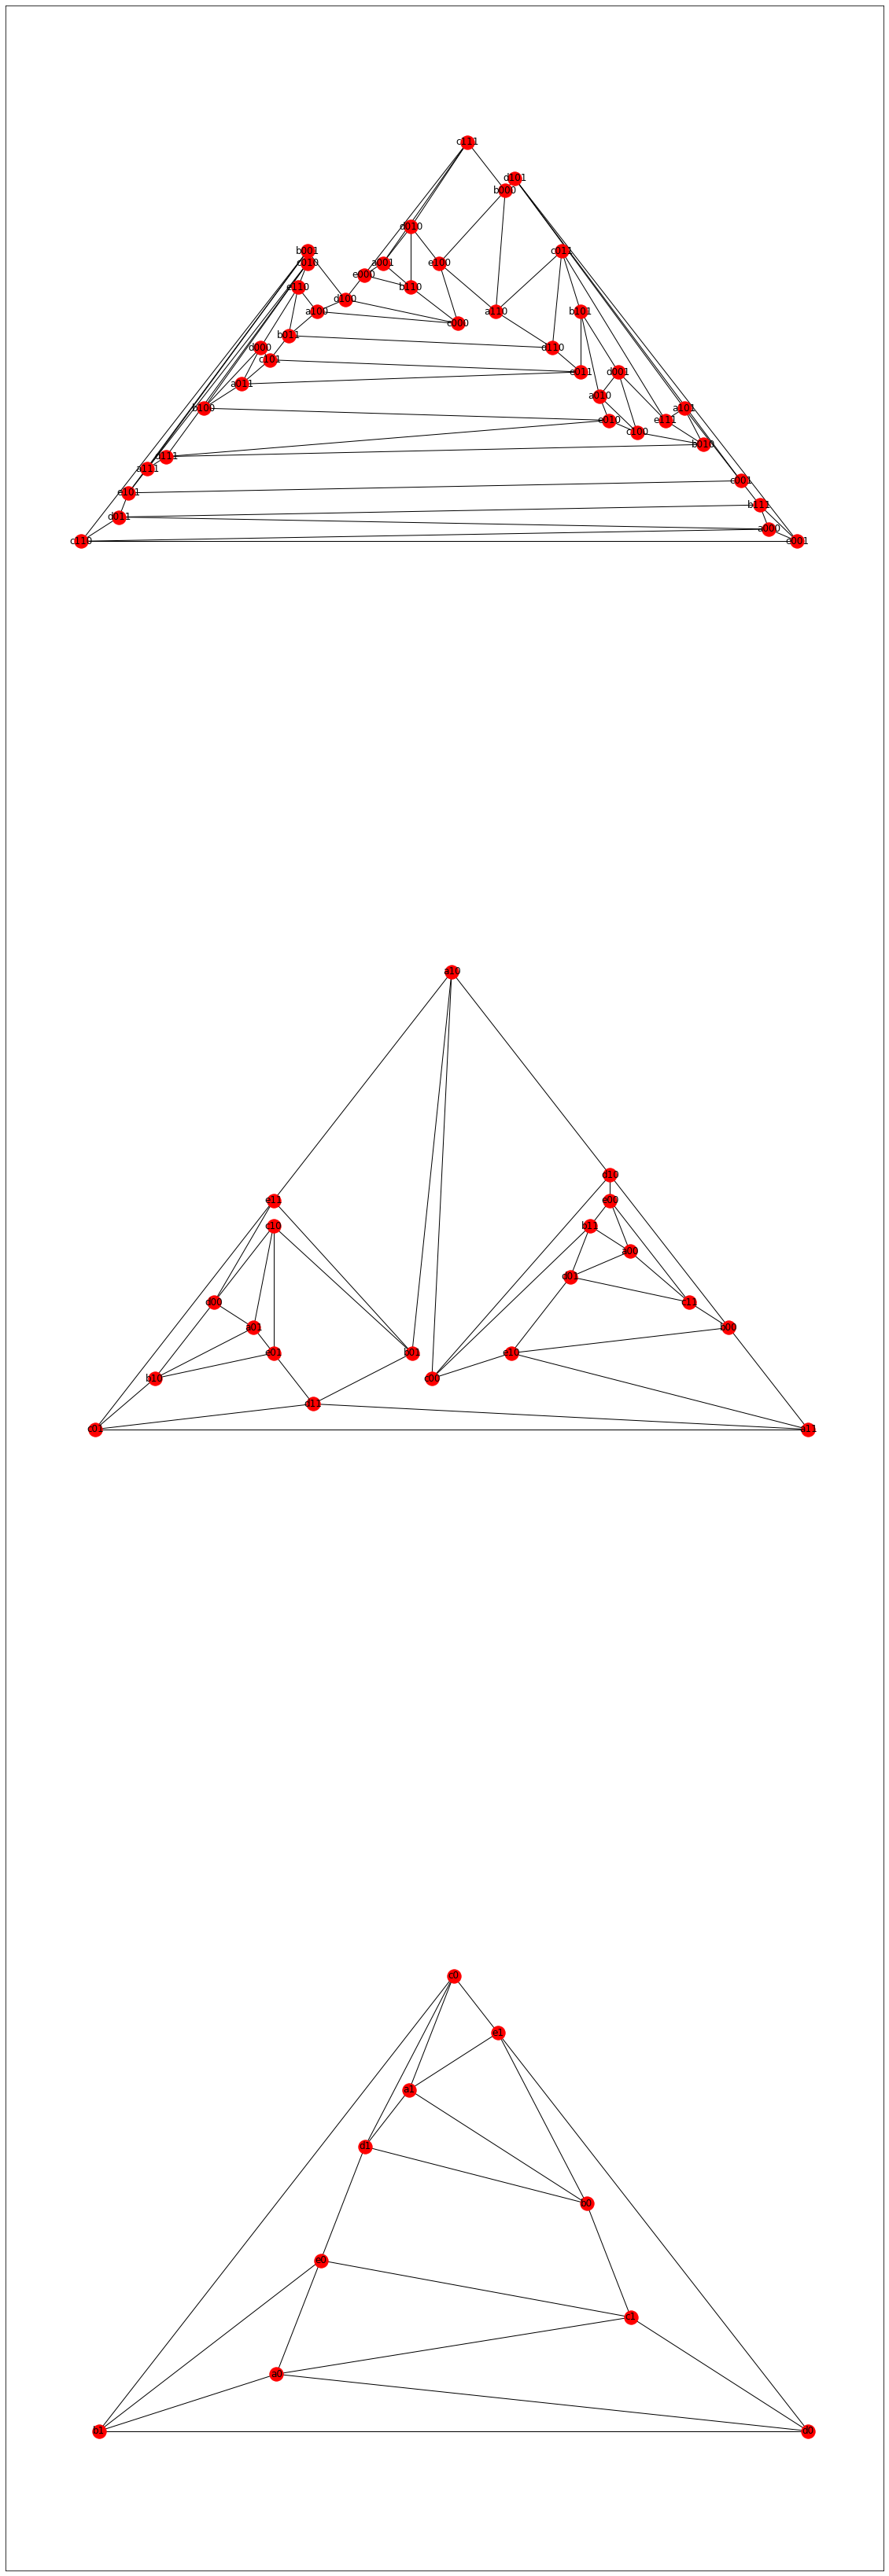

In [7]:
plt.rcParams['figure.figsize'] = [20, 60]

rando_cover = K5

for i in range(0,3):
    for j in range(0,100*(10**i)):
        rando_cover2 = randomCover(rando_cover, 2)
        if nx.is_planar(rando_cover2):
            position = nx.planar_layout(rando_cover2)
            for key in position.keys():
                position[key] += np.array([0,2*i])
            nx.draw_networkx(rando_cover2, pos=position, node_color=["red"])
            rando_cover = rando_cover2
            print("cover degree " + str(2**(i+1)) + " found...")
            break
        



Now we can move onto $K_{2,2,2,1}$:

Is X planer? False


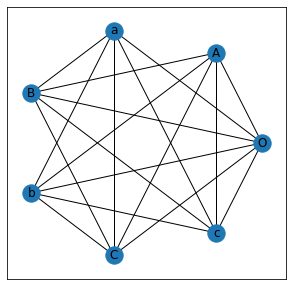

In [8]:
plt.rcParams['figure.figsize'] = [5, 5]

K2221edgelist = [('O','A'), ('O','a'),('O','B'),('O','b'),('O','C'),('O','c'),
('A','B'),('A','b'), ('A','C'), ('A','c'),
('a','B'), ('a','b'), ('a', 'C'), ('a', 'c'),
('B','C'), ('B','c'),
('b', 'C'), ('b','c')]
K2221 = nx.Graph()
K2221.add_edges_from(K2221edgelist)
nx.draw_networkx(K2221, pos=nx.circular_layout(K2221))
print("Is X planer? " + str(nx.is_planar(K2221)))


As before we can try performing brute force searches. Unsurprisingly, I get a sea of blue.

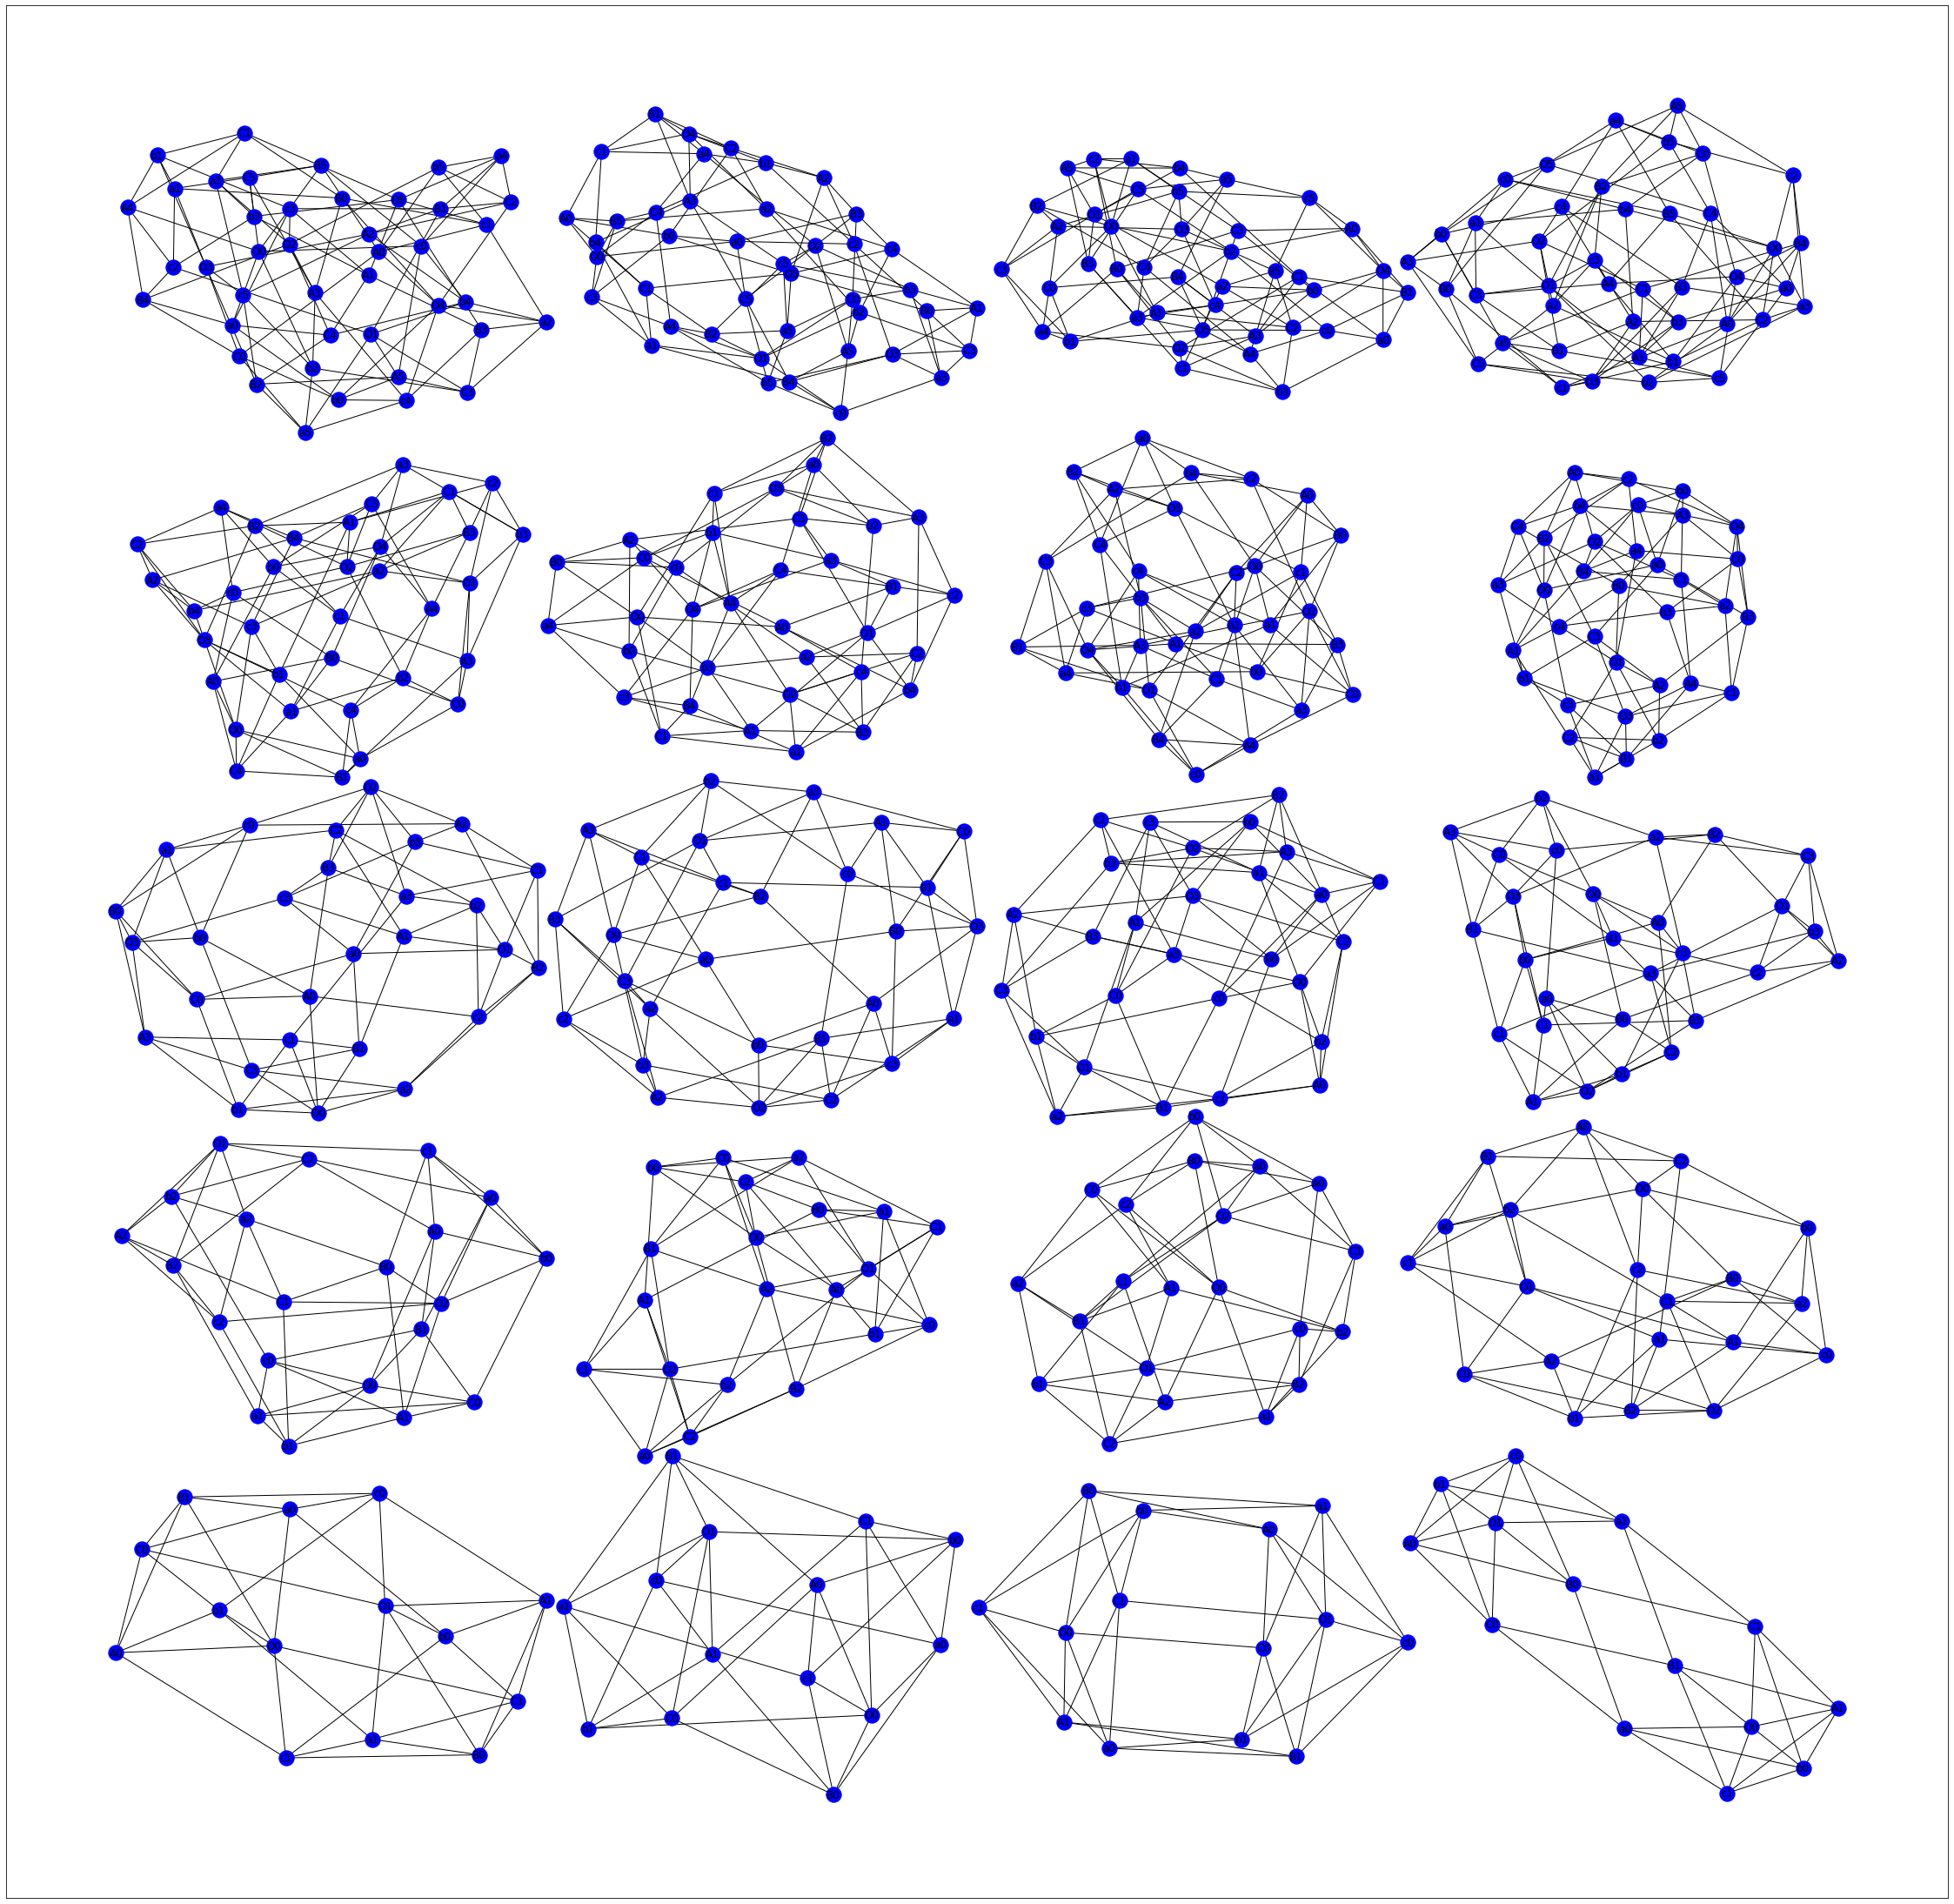

In [12]:
plt.rcParams['figure.figsize'] = [40, 40]

covers = []
for d in range(2,7):
    covers.append([])
    for i in range(0,4):
        covers[-1].append(randomCover(K2221, d))

        if nx.is_planar(covers[-1][-1]):
            position = nx.planar_layout(covers[-1][-1])
            for key in position.keys():
                position[key] += np.array([2*i,2*d])
            nx.draw_networkx(covers[-1][-1], pos=position, node_color=["red"])
        else:
            position = nx.spring_layout(covers[-1][-1])
            for key in position.keys():
                position[key] += np.array([2*i, 2*d])
            nx.draw_networkx(covers[-1][-1], pos=position, node_color=["blue"])

The following just allows me to look at the last example a generated above more closely. You can inspect others by changing the indices in the double indexed array "covers".

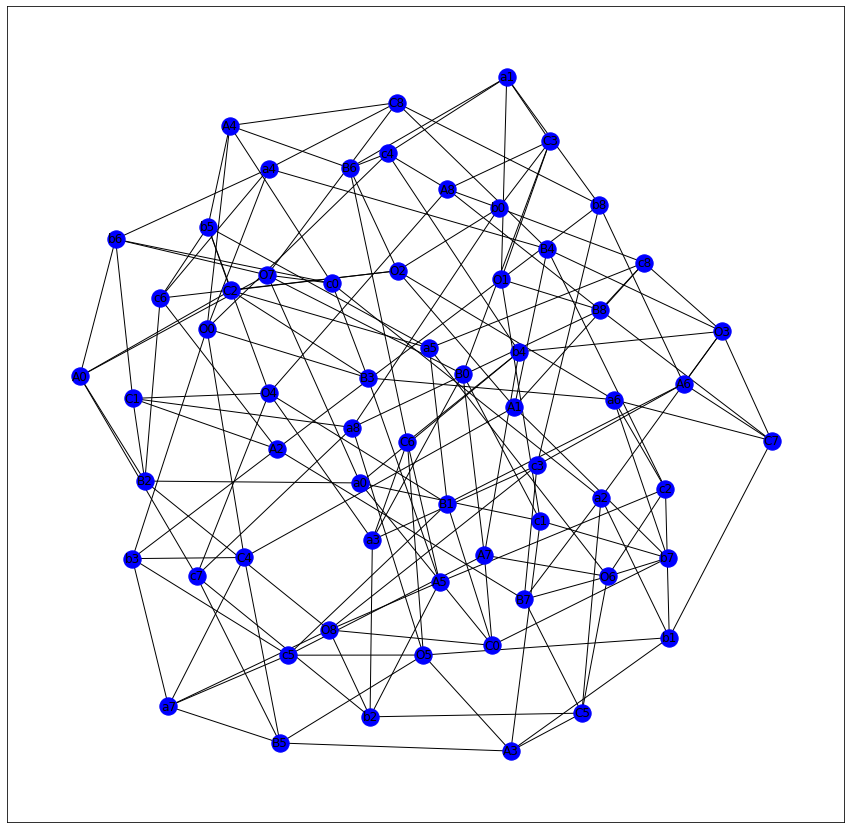

In [10]:
plt.rcParams['figure.figsize'] = [15, 15]
nx.draw_networkx(covers[-1][-1], pos=nx.spring_layout(covers[-1][-1]), node_color=["blue"])


0
cover degree 2 not found...
1
cover degree 4 not found...
2
cover degree 8 not found...
3
cover degree 16 not found...
4
cover degree 32 not found...
5
cover degree 64 not found...


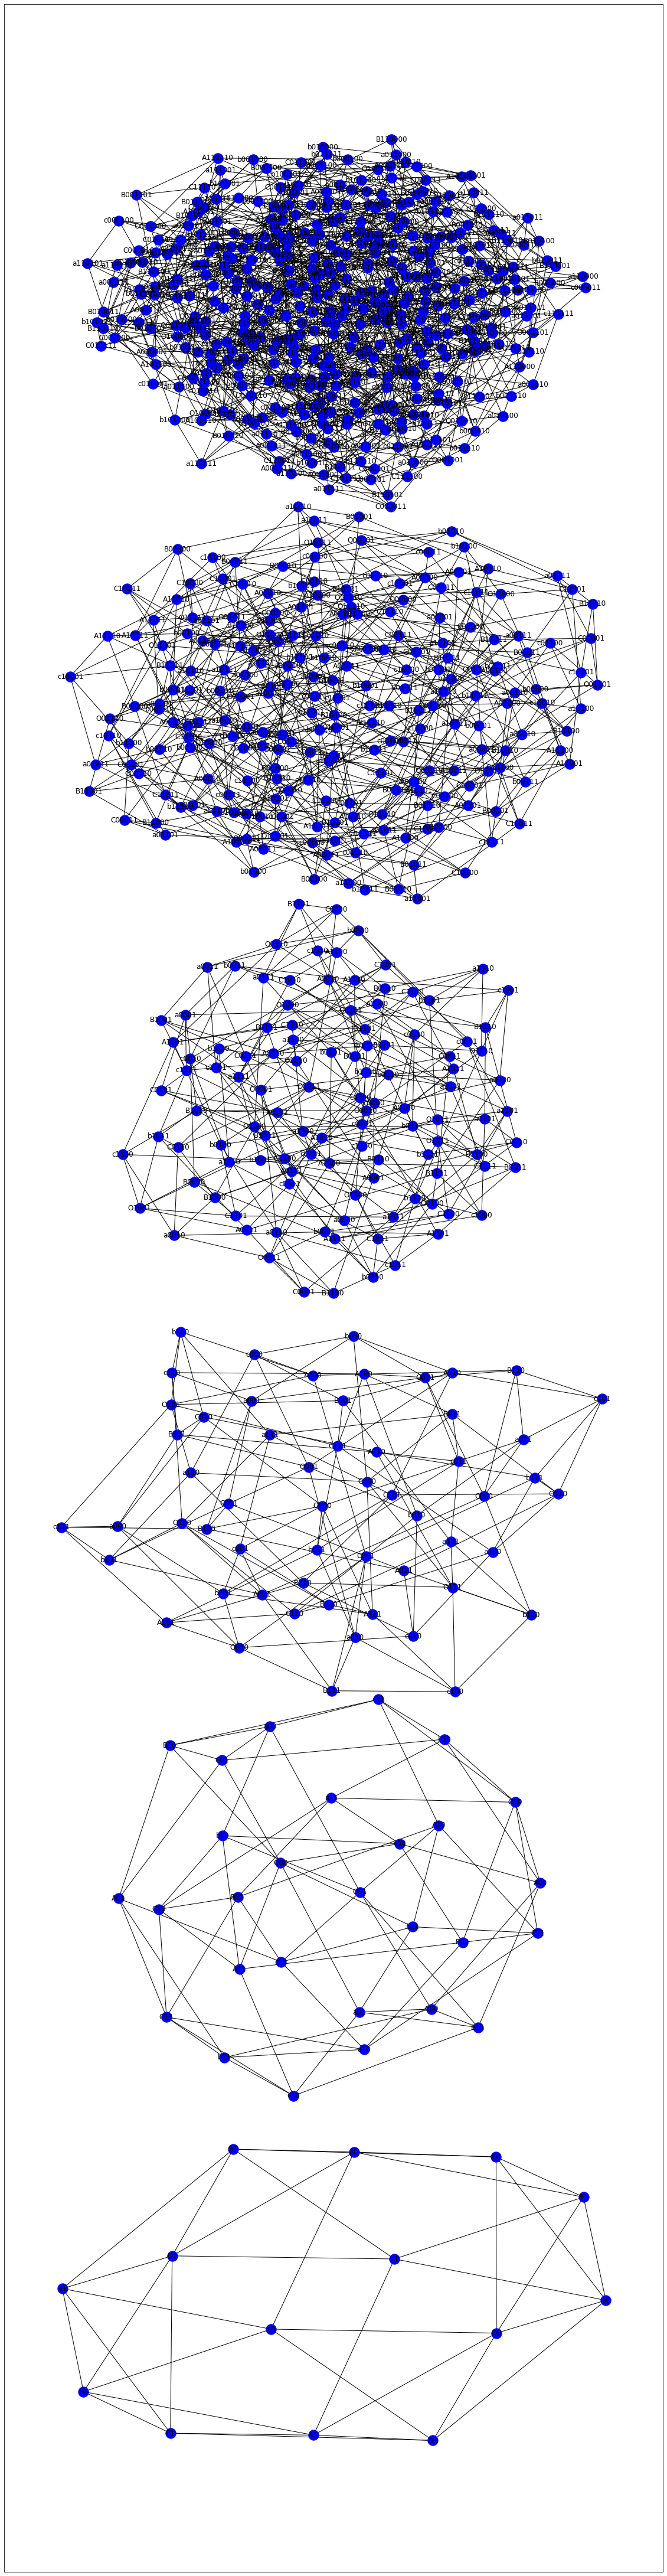

In [13]:
plt.rcParams['figure.figsize'] = [20, 80]

rando_cover = K2221
p = 2 # our chosen prime

def attempts(n):
    return 100 

for i in range(0,6):
    print(i)
    for j in range(0,attempts(i)):
        rando_cover2 = randomCover(rando_cover, p)
        if nx.is_planar(rando_cover2):
            position = nx.planar_layout(rando_cover2)
            for key in position.keys():
                position[key] += np.array([0,2*i])
            nx.draw_networkx(rando_cover2, pos=position, node_color=["red"])
            rando_cover = rando_cover2
            print("cover degree " + str(p**(i+1)) + " found...")
            break
        elif j == attempts(i) -1:
            position = nx.spring_layout(rando_cover2)
            for key in position.keys():
                position[key] += np.array([0,2*i])
            nx.draw_networkx(rando_cover2, pos=position, node_color=["blue"])
            rando_cover = rando_cover2
            print("cover degree " + str(p**(i+1)) + " not found...")
            